In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df = pd.read_csv("11-iris.csv")


In [19]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df = df.drop("Id", axis=1)

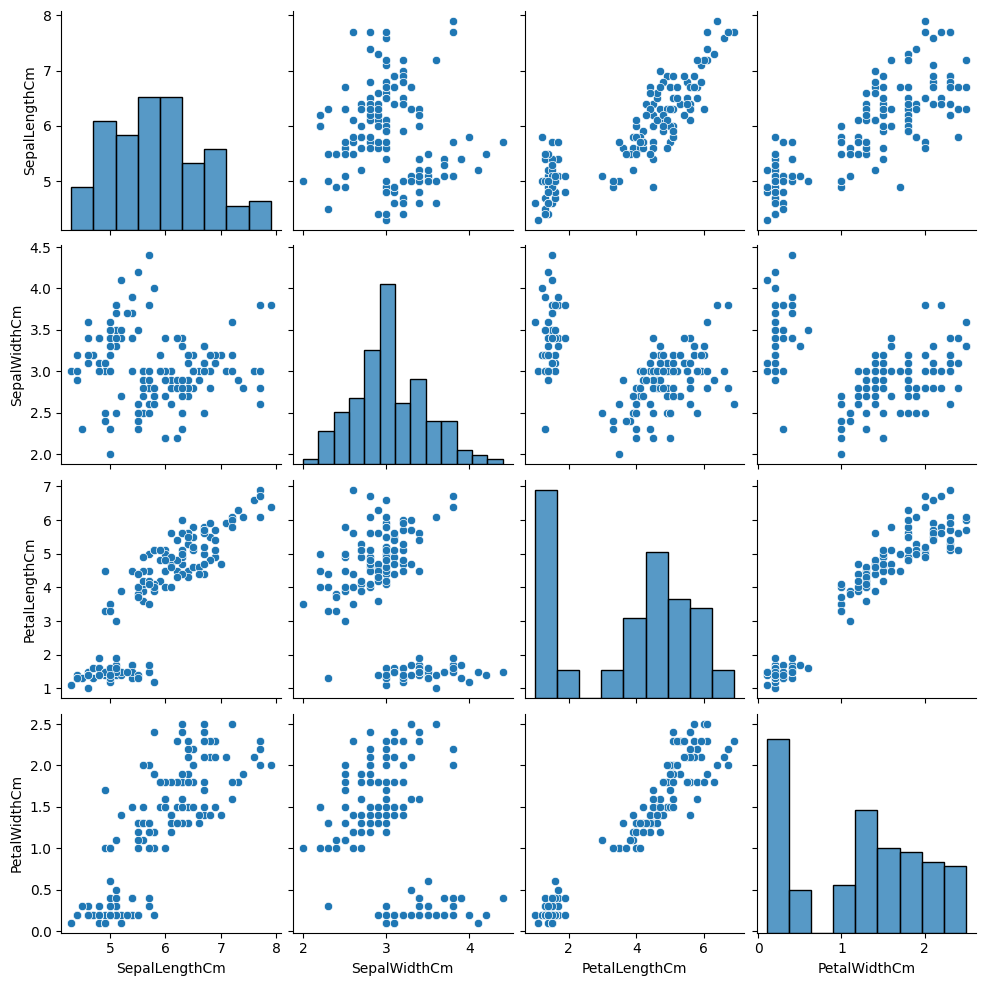

In [22]:
sns.pairplot(df)

In [23]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

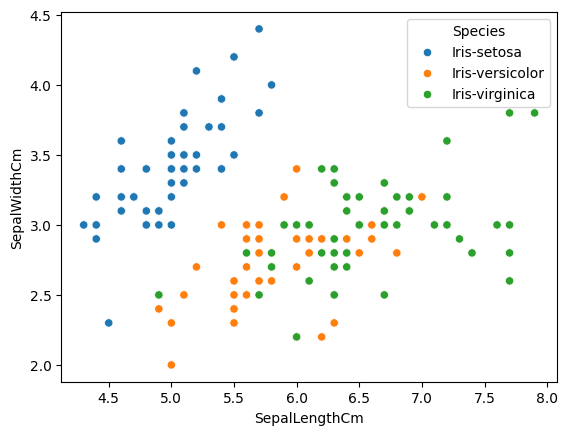

In [24]:
sns.scatterplot(df, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

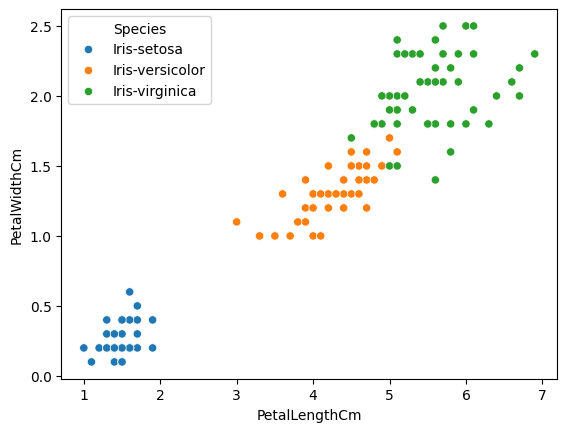

In [25]:
sns.scatterplot(df, x="PetalLengthCm", y="PetalWidthCm", hue="Species")

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoder = LabelEncoder()

In [28]:
df["Species"] = label_encoder.fit_transform(df["Species"])

In [29]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
gnb = GaussianNB()

In [38]:
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [39]:
y_pred = gnb.predict(X_test_scaled)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

1.0
